# Описание проекта

В рамках проекта мною будут рассмотрены исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Задача моего исследования состоит в том, чтобы выявить определяющие успешность игры закономерности на основе, рассматриваемых мною, данных. Выводы моего исследования позволят сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


Своё исследование я буду проводить в несколько шагов:
1. Открыть файл с данными
2. Подготовка данных
3. Исследовательский анализ
4. Составление портрета пользователя каждого региона
5. Проверка гипотез
6. Общий вывод

##### Описание данных
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import warnings as wr
import seaborn as sns
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import statistics

In [2]:
wr.filterwarnings('ignore')

In [3]:
try:
    data = pd.read_csv('C:/Users/crugl/Downloads/games.csv', sep=',')
except:
    data = pd.read_csv('/datasets/games.csv', sep=',')

In [4]:
#pd.set_option('display.float_format', '{:.2f}'.format)
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Шаг 2. Подготовьте данные

In [5]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


__Вывод__

После поверхностного взгляда на данные, выделю следующие замечания:
1. Названия столбцов имеют не однообразный вид
2. Некоторые столбцы требуют изменения типа данных

*  __Замените названия столбцов (приведите к нижнему регистру)__

In [7]:
data.columns = data.columns.str.lower()

*  __Обработайте пропуски при необходимости__

Для начала проверим явные дубликаты

In [8]:
data.duplicated().sum()

0

И неполные дубликаты

In [9]:
data.duplicated(subset=['name', 'platform', 'year_of_release', 'genre'], keep=False).sum()

4

In [10]:
data.loc[data.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


In [11]:
data = data.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='first')

Проверим есть ли пропуски в данных

In [12]:
data.isna().sum()

name                  1
platform              0
year_of_release     269
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         6700
rating             6765
dtype: int64

* Столбец name

In [13]:
data.loc[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.0,0.08,NaN,NaN,NaN


В столбце name два пропущенных значения. Я считаю, что эти строки можно удалить, так как не удастся восстановить эти данные.

In [14]:
data = data.dropna(subset=['name'])

* Столбец year_of_release

В столбце year_of_release 269 пропусков из 16713, восстановить эти данные по моему мнению невозможно, поэтому я удалю пропуски

In [15]:
data = data.dropna(subset=['year_of_release'])

* Столбцы critic_score, rating, user_score

In [16]:
data['critic_score'].isna().sum()

8461

In [17]:
data['rating'].isna().sum()

6676

В столбцах восстановить данные по моему мнению невозможно, но и удалять их тоже не стоит, так как я потеряю большое количество данных

In [18]:
data['user_score'].isna().sum()

6605

In [19]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [20]:
data.user_score.replace('tbd', np.nan, inplace=True)

В столбце user_score есть значения "tbd". TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). TBD может использоваться для описания ситуаций, где окончательное решение еще не принято, но появится в будущем.

Заменю значение "tbd" на пропуски.

*  __Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему__

In [21]:
data['year_of_release'] = data['year_of_release'].astype('int')

year_of_release меняю тип данных на целоисчисленный

In [22]:
data['genre'] = data['genre'].astype('str')

genre меняю тип данных на строку

In [23]:
data['user_score'] = data['user_score'].astype('float')

user_score меняю тип данных на вещественый

* __Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец__

In [24]:
def sales_amount (row):
    """
    Функция суммирует все продажи и возвращает
    результат
    """
    result = row['na_sales'] + row['eu_sales'] + row['jp_sales'] + row['other_sales']
    return result

In [25]:
data['total_sales'] = data.apply(sales_amount, axis=1)

__Вывод__

На этом шаге мною были рассмотрены и обработаны пропуски в столбцах name, year_of_release, critic_score, user_score и rating. Так же я изменил тип данных в столбцах year_of_release, genre, user_score. Создал новый столбец total_sales, в котором находятся данные о сумме продаж

## Шаг 3. Проведите исследовательский анализ данных

* __Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?__


<Axes: title={'center': 'Количество вышедших игр по годам'}, xlabel='год релиза', ylabel='количество игр'>

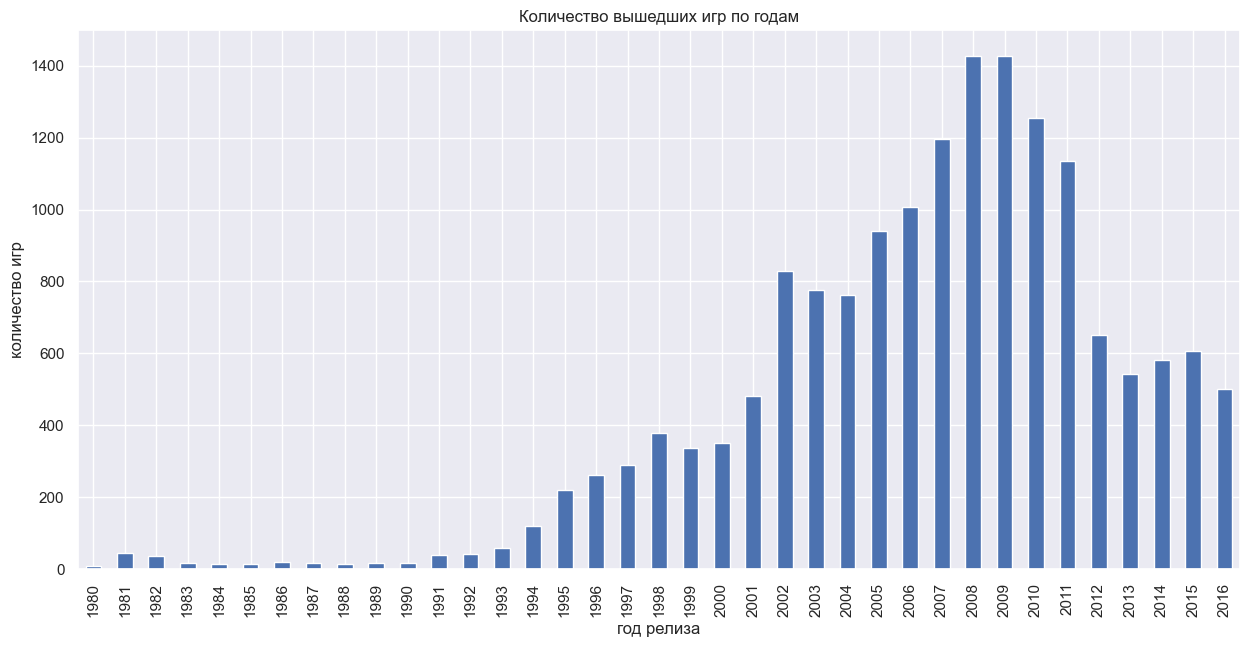

In [26]:
sns.set(rc = {'figure.figsize':(15,7)})
data.pivot_table(index='year_of_release', values='name',
                 aggfunc='count').plot(kind='bar', xlabel='год релиза', 
                                       ylabel='количество игр', grid=True, 
                                       title='Количество вышедших игр по годам',
                                       figsize=(15, 7), legend=False)

__Вывод__

Нет, данные за весь период в моём исследовании не понадобятся. Можно заметить что больше всего игр выпускалось с 2002 по 2012 гг.

* __Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?__

In [ ]:
data.pivot_table(index='year_of_release', columns='platform', values='name',
                 aggfunc='count').plot(kind='bar', xlabel='год релиза', 
                                       ylabel='количество игр', grid=True, 
                                       title='Количество вышедших игр по годам',
                                       figsize=(15, 7), legend=True, 
                                       stacked=True).legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [ ]:
data.groupby('platform')['total_sales'].sum().sort_values().plot(kind='bar', grid=True,
                                                                xlabel='сумма продаж', ylabel='платформы',
                                                                title='Сумма продаж по платформам',
                                                                figsize=(15,7))

Платформы с наибольшими суммарными продажами: DS, Wii, PS3, X360, PS2

In [ ]:
top_sales = ['PS', 'DS', 'Wii', 'PS3', 'X360', 'PS2']

In [ ]:
data.query('platform in @top_sales').pivot_table(index='year_of_release', 
                                                 columns='platform', values='total_sales',
                                                 aggfunc='sum').plot(kind='bar', figsize=(15,7), 
                                                                     stacked=True, xlabel='год релиза',
                                                                     ylabel='cумма продаж', grid=True,
                                                                     title='Сумма продаж топ-6 платформ по годам')

__Вывод__

Я выделил 6 платформ с наибольшими суммами продаж. В среднем платформа существует в течение 10 лет. Бум образования новых платформ и релизов новых игр пришелся на период 2002 - 2012 гг.

* __Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.__

In [ ]:
actual_data = data.query('year_of_release >= 2011')

* __Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.__

In [ ]:
actual_data.pivot_table(index='year_of_release', columns='platform', values='total_sales',
                        aggfunc='sum').plot(kind='bar', stacked=True,  
                        figsize=(15,7), ylabel='сумма продаж',
                        xlabel='год релиза', grid=True,
                        title='Сумма продаж разных платформ за 5 лет')

In [ ]:
data.query('year_of_release >= 2005').pivot_table(index='platform',
                           columns='year_of_release', values='total_sales',
                           aggfunc='sum')

In [ ]:
act_top = ['PS4', 'XOne', 'PSV', '3DS', 'PC', 'WiiU']

In [ ]:
perspective_pl = actual_data.query('platform in @act_top')

In [ ]:
perspective_pl.pivot_table(index='year_of_release',
                           columns='platform', values='total_sales',
                           aggfunc='sum').plot(xlabel='год релиза', 
                                               ylabel='сумма продаж',
                                               grid=True, figsize=(15,7), 
                                               title='Сумма продаж перспективных платформ')
                                                                           

__Вывод__

Исходя из данных за последние 5 лет, я хочу выделить 4 платформы, которые имеют перспективы в будущем стать лидерами по продажам. PS4, XOne, PSV и 3DS. Такой вывод я сделал исходя из того, что они появились на рынке относительно недавно. Соответственно они не прошли еще и половины цикла, а значит можно предположить, что в перспективе они принесут прибыль.

* __Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.__

In [ ]:
actual_data.head()

In [ ]:
sns.boxplot(data=actual_data,
            x='platform', 
            y='total_sales').set(ylim=(0,4), ylabel='сумма продаж млн.', 
                                 xlabel='платформы', title='Распределение продаж')

__Вывод__

В большинстве случаях медианна лежит ниже уровня 0.25 млн копий, значит 50% игр выпускаются относительно небольшими тиражами. Но есть и платформы верхний квантиль которых расположен достаточно выше остальных. Например это можно наблюдать на платформах X360, PS3, PS4, Xone, можно сказать что игры, выпускаемые на эти платформы, продаются в большем количестве, чем на остальные платформы. При этом везде есть значения, которые многократно превышают обычные значения, можно предположить, что это бестселлеры, которые имеют высокую популярность и их покупают в больших количествах.

* __Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.__

In [ ]:
actual_data.query('platform == "XOne"')[['total_sales','user_score', 'critic_score']].agg('corr')

In [ ]:
perspective_pl.query('platform == "XOne"').plot(kind='scatter',
                                            x='total_sales',
                                            y='critic_score', xlabel='оценка критиков',
                                            ylabel='сумма продаж, млн',
                                            title='Диаграмма рассеяния — Оценка критиков — Сумма продаж',
                                            figsize=(15,7), s=20)

In [ ]:
actual_data.query('platform == "XOne"').plot(kind='scatter',
                                            x='total_sales',
                                            y='user_score', xlabel='оценка пользователей',
                                            ylabel='сумма продаж, млн',
                                            title='Диаграмма рассеяния — Оценка пользователей — Сумма продаж',
                                            figsize=(15,7), s=20)

__Вывод__

Сильной корреляции между оценкой и продажами не наблюдается. Например между оценкой пользователей и суммой продаж коэффициент корреляции равен -0.068925, а между оценкой критиков 	и суммой продаж равен 0.416998. Это вполне логично, пиар компания перед релизом игры, в большей мере будет влиять на на продаваемость игры, чем оценки критиков после релиза.

* __Соотнесите выводы с продажами игр на других платформах.__

__PS4__

In [ ]:
actual_data.query('platform == "PS4"').plot(kind='scatter',
                                            x='total_sales',
                                            y='critic_score', xlabel='оценка критиков',
                                            ylabel='сумма продаж, млн',
                                            title='Диаграмма рассеяния — Оценка критиков — Сумма продаж',
                                            figsize=(15,7), s=20)

In [ ]:
actual_data.query('platform == "PS4"').plot(kind='scatter',
                                            x='total_sales',
                                            y='user_score', xlabel='оценка пользователей',
                                            ylabel='сумма продаж, млн',
                                            title='Диаграмма рассеяния — Оценка пользователей — Сумма продаж',
                                            figsize=(15,7), s=20)

In [ ]:
perspective_pl.query('platform == "PS4"')[['total_sales','user_score', 'critic_score']].agg('corr')

__Вывод__

Для PS4 корреляция между количеством проданных игр и оценкой так же незначительная. Но оценки критиков сильнее коррелируют с продажами, нежели оценки пользователей.

__PSV__

In [ ]:
actual_data.query('platform == "PSV"').plot(kind='scatter',
                                            x='total_sales',
                                            y='critic_score', xlabel='оценка критиков',
                                            ylabel='сумма продаж, млн',
                                            title='Диаграмма рассеяния — Оценка критиков — Сумма продаж',
                                            figsize=(15,7), s=20)

In [ ]:
actual_data.query('platform == "PSV"').plot(kind='scatter',
                                            x='total_sales',
                                            y='user_score', xlabel='оценка пользователей',
                                            ylabel='сумма продаж, млн',
                                            title='Диаграмма рассеяния — Оценка пользователей — Сумма продаж',
                                            figsize=(15,7), s=20)

In [ ]:
actual_data.query('platform == "PSV"')[['total_sales','user_score', 'critic_score']].agg('corr')

__Вывод__


Для PSV корреляция между количеством проданных игр и оценкой так же незначительная.

__3DS__

In [ ]:
actual_data.query('platform == "3DS"').plot(kind='scatter',
                                            x='total_sales',
                                            y='critic_score', xlabel='оценка критиков',
                                            ylabel='сумма продаж, млн',
                                            title='Диаграмма рассеяния — Оценка критиков — Сумма продаж',
                                            figsize=(15,7), s=20)

In [ ]:
actual_data.query('platform == "3DS"').plot(kind='scatter',
                                            x='total_sales',
                                            y='user_score', xlabel='оценка пользователей',
                                            ylabel='сумма продаж, млн',
                                            title='Диаграмма рассеяния — Оценка пользователей — Сумма продаж',
                                            figsize=(15,7), s=20)

In [ ]:
perspective_pl.query('platform == "PSV"')[['total_sales','user_score', 'critic_score']].agg('corr')

__Вывод__

Для 3DS корреляция между количеством проданных игр и оценкой так же незначительная.

__Общий вывод__

Оценки пользователей и критиков не сильно влияют на продоваемость игр. Но в случаях с PS4 и XOne корреляция между продажами и оценками критиков выше чем у остальных платформ

* __Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?__

In [ ]:
actual_data.pivot_table(index='genre', values='total_sales', 
                 aggfunc='sum').sort_values(by='total_sales', ascending=False)

In [ ]:
actual_data.pivot_table(index='genre',
                 values='total_sales', 
                 aggfunc='sum').sort_values(by='total_sales', 
                                            ascending=False).plot(kind='bar', 
                                                                 ylabel='сумма продаж, млн.',
                                                                 xlabel='жанры', 
                                                                 title='Распределение игр по жанрам')

In [ ]:
plt.pie(x=actual_data.pivot_table(index='genre',
                 values='total_sales', 
                 aggfunc='sum').sort_values(by='total_sales', 
                                            ascending=False)['total_sales'], 
        labels=['Action', 'Sports', 'Shooter', 'Role-Playing', 'Platform', 'Misc', 'Racing',
               'Fighting', 'Simulation', 'Puzzle', 'Adventure', 'Strategy'], autopct='%1.1f%%')

__Вывод__

Больше половины от общего объема продаж занимают игры жанров action, sports, shooter, и role-playing.

In [ ]:
top_genre = ['Action', 'Sports', 'Shooter', 'Role-Playing'] 

In [ ]:
actual_data.query('genre in @top_genre').pivot_table(index='platform', columns='genre', 
                                                        values='total_sales', 
                                                        aggfunc='sum').plot(kind='bar', stacked=True,
                                                                              xlabel='платформа', ylabel='количество',
                                                                              title='Суммарные продажи игр разных жанров по платформам')

In [ ]:
actual_data.query('genre in @top_genre').pivot_table(index='platform', columns='genre', 
                                                        values='total_sales', 
                                                        aggfunc='mean').plot(kind='bar', stacked=True,
                                                                              xlabel='платформа', ylabel='количество',
                                                                              title='Средние продажи игр разных жанров по платформам')

In [ ]:
actual_data.query('genre in @top_genre').pivot_table(index='platform', columns='genre', 
                                                        values='total_sales', 
                                                        aggfunc='median').plot(kind='bar', stacked=True,
                                                                              xlabel='платформа', ylabel='количество',
                                                                              title='Средние продажи игр разных жанров по платформам')

__Вывод__

Я рассмотрел суммарные, средние и мединны продаж на разных платформах за актуальный период. В суммарных продажах, действительно лидирует игры жанра Action. Рассматривая средние продажи и медиану, игры жанра Action уходят с первого места и выделяются игры жанра shooter, исходя из этого можно сделать вывод, что на рынке много разных игр жанра Action, а жанра Shooter например меньше. 

__Общий вывод__

Я выделил несколько перспективных платформ: 3DS, PS4, PSV, XOne. Самые популярные жанры игры на эти плафтормы: Action, Sports, Shooter, Role-Playing. При этом на портативных консолях жанр shooter менее популярен а жанр role-playing наоборот. Продаваемость игр не сильно зависит от оценок пользователей и критиков. В основном количество экземпляров разных игр на эти платформы не превышает 750 000, но есть и исключительные бестселлеры, которые продаются в большом количестве. 

## Шаг 4. Составьте портрет пользователя каждого региона

__Europe__

* Самые популярные платформы (топ-5)

In [ ]:
actual_data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)

In [ ]:
actual_data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).plot(kind='bar', 
                                                                            xlabel='платформы', ylabel='количество проданных игр', 
                                                                            title='Популярность платформ в европейском регионе')

* Самые популярные жанры (топ-5)

In [ ]:
actual_data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)

In [ ]:
actual_data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).plot(kind='bar', 
                                                                            xlabel='жанры', ylabel='количество проданных игр', 
                                                                            title='Популярность игровых жанров в европейском регионе')

* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [ ]:
actual_data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)

Категоря K-A устаревшая, её заменили на Everyone

In [ ]:
actual_data.loc[data['rating'] == 'K-A', 'rating'] = 'E'

In [ ]:
actual_data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).plot(kind='bar', xlabel='рейтинг',
                                                                             ylabel='количество проданных игр',
                                                                             title='Популярные рейтинги игр в европейском регионе')

__Вывод__

В европейском регионе популярны жанры игр: Action, Sports, Shooter, Misc, Racing, платформы: PS3, X360, Wii, DS, PS4. Чаще всего продаются игры с рейтингом Everyone.

__North America__

* Самые популярные платформы (топ-5)

In [ ]:
actual_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False)

In [ ]:
actual_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False).plot(kind='bar', 
                                                                            xlabel='платформы', ylabel='количество проданных игр', 
                                                                            title='Популярность платформ в Северной Америке')

* Самые популярные жанры (топ-5)

In [ ]:
actual_data.groupby('genre')['na_sales'].sum().sort_values(ascending=False)

In [ ]:
actual_data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).plot(kind='bar', 
                                                                            xlabel='жанры', ylabel='количество проданных игр', 
                                                                            title='Популярность игровых жанров в Северной Америке')

* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [ ]:
actual_data.groupby('rating')['na_sales'].sum().sort_values(ascending=False)

In [ ]:
actual_data.groupby('rating')['na_sales'].sum().sort_values(ascending=False).plot(kind='bar', xlabel='рейтинг',
                                                                             ylabel='количество проданных игр',
                                                                             title='Популярные рейтинги игр в Северной Америке')

__Вывод__

В Северной Америке популярны жанры игр: Action, Sports, Shooter, Misc, Role-Playing, платформы: X360, Wii, PS3, DS, PS2. Чаще всего продаются игры с рейтингом Everyone.

__Japan__

* Самые популярные платформы (топ-5)

In [ ]:
actual_data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)

In [ ]:
actual_data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).plot(kind='bar', 
                                                                            xlabel='платформы', ylabel='количество проданных игр', 
                                                                            title='Популярность платформ в Японии')

* Самые популярные жанры (топ-5)

In [ ]:
actual_data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)

In [ ]:
actual_data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).plot(kind='bar', 
                                                                            xlabel='жанры', ylabel='количество проданных игр', 
                                                                            title='Популярность игровых жанров в Японии')

* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [ ]:
actual_data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

In [ ]:
actual_data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).plot(kind='bar', xlabel='рейтинг',
                                                                             ylabel='количество проданных игр',
                                                                             title='Популярные рейтинги игр в Японии')

__Вывод__

В Японии популярны жанры игр: Role-Playing, Action, Sports, Platform, Misc, платформы: DS, 3DS, PS2, PSP, Wii. Чаще всего продаются игры с рейтингом Everyone.

__Остальной мир__

* Самые популярные платформы (топ-5)

In [ ]:
actual_data.groupby('platform')['other_sales'].sum().sort_values(ascending=False)

In [ ]:
actual_data.groupby('platform')['other_sales'].sum().sort_values(ascending=False).plot(kind='bar', 
                                                                            xlabel='платформы', ylabel='количество проданных игр', 
                                                                            title='Популярность платформ в остальном мире')

* Самые популярные жанры (топ-5)

In [ ]:
actual_data.groupby('genre')['other_sales'].sum().sort_values(ascending=False)

In [ ]:
actual_data.groupby('genre')['other_sales'].sum().sort_values(ascending=False).plot(kind='bar', 
                                                                            xlabel='жанры', ylabel='количество проданных игр', 
                                                                            title='Популярность игровых жанров в остальном мире')

* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [ ]:
actual_data.groupby('rating')['other_sales'].sum().sort_values(ascending=False)

In [ ]:
actual_data.groupby('rating')['other_sales'].sum().sort_values(ascending=False).plot(kind='bar', xlabel='рейтинг',
                                                                             ylabel='количество проданных игр',
                                                                             title='Популярные рейтинги игр в остальном мире')

__Вывод__

В остальном мире популярны жанры игр: Action, Sports, Shooter, Racing, Misc, платформы: PS2, PS3, X360, Wii, DS. Чаще всего продаются игры с рейтингом Everyone.

__Общий вывод__

В этом разделе я исследовал популярность платформ и жанров по регионам. У каждого региона есть свой специфический вкус на платформы и игры, так, например, в Японии самым популярным жанром является Role-Playing, а в Северной Америке и Европе Action. В Европе первой место занимает PS3, в Северной Америке X360 а в Японии DS. Но основная часть жанров и платформ достаточна популярна во всех регионах, отличается лишь местом в топе. Например PS2, PS3, X360 присутствуют в каждом топе. Такая же ситуация и с жанрами в Action, Sport, и Misc играют в каждом регионе, но где-то их любят больше, где-то меньше. В Японии больше любят играть в портативные приставки.

## Шаг 5. Проверьте гипотезы

* __Средние пользовательские рейтинги платформ Xbox One и PC одинаковые__

H0: Средние пользовательские рейтинги платформ Xbox One и PC равны

H1: Средние пользовательские рейтинги платформ Xbox One и PC не равны

In [ ]:
xone_user_score = actual_data.query('platform == "XOne"')['user_score'].dropna().reset_index(drop=True)

In [ ]:
len(xone_user_score)

In [ ]:
statistics.pvariance(xone_user_score)

In [ ]:
pc_user_score = actual_data.query('platform == "PC"')['user_score'].dropna().reset_index(drop=True)

In [ ]:
len(pc_user_score)

In [ ]:
statistics.pvariance(pc_user_score)

In [ ]:
alpha = 0.05
result_1 = st.ttest_ind(xone_user_score,
                        pc_user_score, equal_var=False)

if result_1.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
print('p-значение', result_1.pvalue)

__Вывод__

В ходе статистического теста, нулевая гипотеза отвергается в пользу алтернативной. Нулевая гипотеза сформулирована как равенство двух средних. Альтернативная гипотеза является двусторонней.

* __Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные__

H0: Средние пользовательские рейтинги жанров Action и Sports равны

H1: Средние пользовательские рейтинги жанров Action и Sports не равны

In [ ]:
action_user_score = actual_data.query('genre ==  "Action"')['user_score'].dropna().reset_index(drop=True)

In [ ]:
len(action_user_score)

In [ ]:
sports_user_score = actual_data.query('genre ==  "Sports"')['user_score'].dropna().reset_index(drop=True)

In [ ]:
len(sports_user_score)

In [ ]:
result_2 = st.ttest_ind(action_user_score,
                        sports_user_score)

if result_2.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
print('p-значение', result_2.pvalue)

__Вывод__

В ходе статистического теста, нулевая гипотеза отвергается в пользу альтернативной. Нулевая гипотеза сформулирована как равенство двух средних. Альтернативная гипотеза является двусторонней.

## Шаг 6. Общий вывод

В ходе исследования я выявил "жизненный цикл" платформ, это период времени в течение которого платформы явяляются актуальными и именно в этот период выпускаются игры на эти платформы. Если есть понимание о том какие платформы сейчас актуальны, то резонно сделать акцент на продажу игр именно на эти платформы. Я выделил следующие актуальные платформы, которые либо только начинают свой "цикл", либо которые прошли середину и так же являются актуальными, это PS4, XOne, PSV и 3DS. Большие продажи зависят и от популярности игры, популярный игры продаются в больших экземплярах, чем менее популярные. Оценки критиков и пользователей не сильно влияют на продаваемость игры и опираться в продажах, только исходя из оценок не лучшая стратегия. Стоит обратить внимание на жанр игр. Есть жанры игр, которые нравятся большинству игроков, а есть которые подходят лишь небольшому кругу игроков. Я выделил самые популярные жанры, которые очень востребованы, это Action, Sports, Shooter и Role-Playing. Эти жанры универсально востребованы во всех регионов, но где-то они продаются лучше, где-то хуже. 

Подводя итог, бизнесу я хочу порекомендовать следующее:
1. Сосредоточиться на продажах игр на актуальные платформы. (PS4, XOne, PSV и 3DS)
2. Всегда иметь в продаже популярные игры, отслеживать даты громких релизов.
3. В зависимости от региона сделать акцент на популярные жанры.
   - Европа: Action, Sport, Shooter, Racing, Misc
   - Северная Америка: Action, Sport, Shooter, Platform, Misc
   - Япония: Role-Playing, Action, Sport, Platform, Misc